In [2]:
##Problem Statement - titanicData Survivor
## In this project we try to predict given the parametres like gender , fare of the ticket
## class of the ticket , would a human being survive the titanicData disaster or ont
##For this we will be taking a sample dataset from kaggle and try to build a model around it 
##and then calculate how much accurate is the model we have built

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
##loading up the dataset
titanicData=pd.read_csv("titanic.csv")


In [5]:
##let us do some explorations and visualizations on the data
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanicData.describe()
## this gives us a detailed idea about each and every numerical column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
sns.countplot(data=titanicData,x='Survived',hue='Sex')
## as per the below chart , it seems that females had a higher chance of survival
##note here 0 means you did not survive and 1 means you survived

NameError: name 'titanicData' is not defined

<AxesSubplot:xlabel='Survived', ylabel='count'>

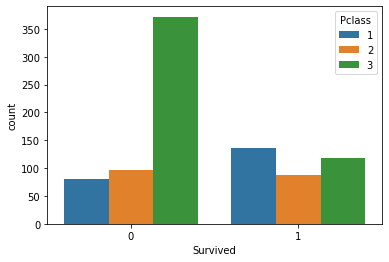

In [6]:
sns.countplot(data=titanicData,x='Survived',hue='Pclass')
##as per the below chart it seems that if someone was in class 3 chances of survival were
## pretty less while if someone was in class 1 , chances of survival were good(not saying
## you will definitely survive , but good is used as a relative term here in comparison
## with other classes whereas class 2 almost had an equal distribution of decease and 
## survivors)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

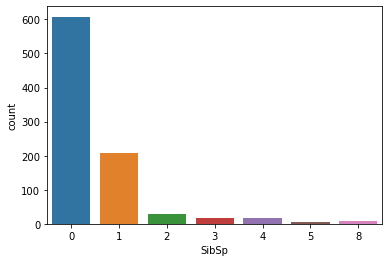

In [7]:
sns.countplot(data=titanicData,x='SibSp')
## here the sibsp column refers to people having sibblings and spouses...as per the plot 
## it seems that most of passengers on titanicData did not have either spouse or sibblings
## Around 200 passengers had 1 sibbling or spouse
##then the count drop drastically

<AxesSubplot:xlabel='Fare', ylabel='Count'>

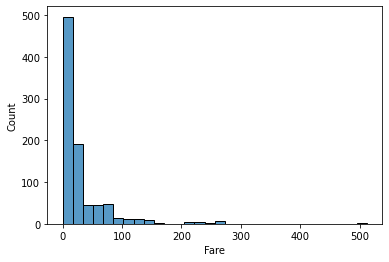

In [8]:
sns.histplot(data=titanicData,x='Fare',kde=False,bins=30)
## as per the below chart it seems that there were many people who travelled on a ticket
## which was very cheap in price. The plot seems consistent with the data we plotted 
## on passenger classes. As the fare increased , passengers travelling on that fare
## or that class1 decreased drastically

In [9]:
titanicData.info()
##as per the below data we see that there are many missing entries in the data especially
##for column age , cabin and embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

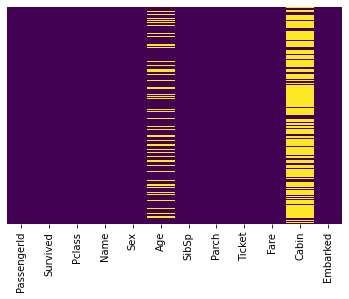

In [10]:
## we can also check the missing values using seaborn library
sns.heatmap(titanicData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
##the column cabin is just the cabin no of ship the passengers were living in
##this column can be considered as a noisy data
##this has no value in depicting outcome so we can drop it
titanicData.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

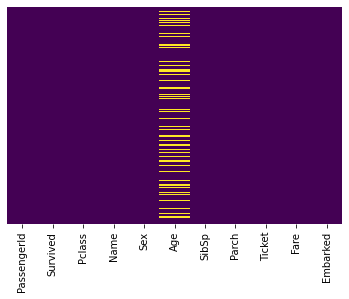

In [12]:
sns.heatmap(titanicData.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [13]:
##now our job is to remove the missing values in age column
##we can do one thing...we can replace the blank values in age column by any randon number
##another approach might be we can replace the missign values in age column by choosing the average value 
##the average age in the particular passenger class

def removeNullValuesInAgeColumn(data):
    age=data[0]
    pclass=data[1]
    if(pd.isnull(age)):
        if(pclass==1):
            return round(titanicData[titanicData['Pclass']==1]['Age'].mean())
        elif(pclass==2):
            return round(titanicData[titanicData['Pclass']==2]['Age'].mean())
        else:
            return round(titanicData[titanicData['Pclass']==3]['Age'].mean())
    else:
        return age

titanicData['Age']=titanicData[['Age','Pclass']].apply(removeNullValuesInAgeColumn,axis=1)

<AxesSubplot:>

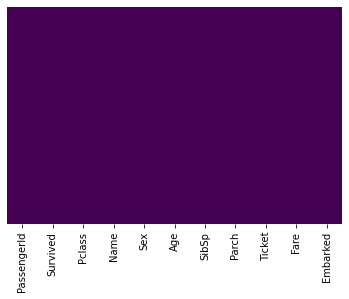

In [14]:
sns.heatmap(titanicData.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [15]:
##as per the above graph , since we are getting a single block
##so we can be sure they are no missing values
##now since we are dealing with the machine learning models we cannot provide categorical data to the model
## we will use pandas to convert the catogorical data to numerical values
gender=pd.get_dummies(titanicData['Sex'],drop_first=True)

In [16]:
gender
##the reason we used drop_first is if male is 0 female will automatically be 1 and vice versa

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
embarked=pd.get_dummies(titanicData['Embarked'],drop_first=True)

In [18]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [19]:
##concatenating these 2 dataframes into our parent frame
titanicData=pd.concat([titanicData,gender,embarked],axis=1)

In [20]:
titanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


In [21]:
titanicData.drop(['Name','Ticket','PassengerId','Pclass','Sex','Embarked'],axis=1,inplace=True)

In [22]:
titanicData

,Survived,Age,SibSp,Parch,Fare,male,Q,S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,0,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [23]:
##Here y is the column what we are trying to predict 
## Similarly X is the data frame of parametres that will help us to predict the Y column
y=titanicData['Survived']
X=titanicData.drop(['Survived'],axis=1)

In [24]:
X

,Age,SibSp,Parch,Fare,male,Q,S
0,22.0,1,0,7.2500,1,0,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1
887,19.0,0,0,30.0000,0,0,1
888,25.0,1,2,23.4500,0,0,1
889,26.0,0,0,30.0000,1,0,0


In [25]:
##using train_test_split method to split our data into training data and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [28]:
logic=LogisticRegression(max_iter=200)

In [29]:
## using fit method to train the model
logic.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [30]:
## this time is for testing the model...in this model will make the predictions on the basis of the test data we feed it
predictions=logic.predict(X_test)

In [32]:
## printing the classification report i.e printing the parametres that will guide us if our model is suitable
## to predict if someone would have survuved the titanic disaster
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.65      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



In [ ]:
## On the basis of above result , it is clear that our model is 77% accurate.
## support basically tells that how many cases of a given category were present in our data
## we had 154 cases of people who did not survive and 114 cases of people who actually survived
## so we can infer that our test data had a good balance
## precision tells us that on the basis of data provided for a particular category , how many actually belonged to that category
## so , for people who did not survive , we had a precision 0f 77% , it means that out of the data provided for 0 , 77% were actually 0
## same goes with the precision for people who survived the accident
